# Spatial Brain Tumor Concentration Estimation


In [1]:
# Set the paths to the data
tumorSegmentationPath = "data/data_001/segm.nii.gz"
wmPath = "./data/data_001/t1_wm.nii.gz"
gmPath = "./data/data_001/t1_gm.nii.gz"
csfPath = "./data/data_001/t1_csf.nii.gz"
petImagePath = "./data/data_001/FET.nii.gz" # optional data

# optional path to tumor recurrence for wandb performance logging
recurrencePath = "data/data_001/segm_rec.nii.gz"

# Set the results path
savePath = "./results/estimateTumorConcentration/"

In [2]:
from spatial_brain_tumor_concentration_estimation import estimateTumorConcentration
estimateTumorConcentration.estimateBrainTumorConcentration(tumorSegmentationPath, wmPath, gmPath, csfPath, savePath, petImagePath, recurrencePath)

Create sweep with ID: 38y7mxyl
Sweep URL: https://wandb.ai/tumcompimg/optimize_tumor_concentration/sweeps/38y7mxyl


wandb: Agent Starting Run: 0yvmndjh with config:
wandb: 	csfSegPath: ./data/data_001/t1_csf.nii.gz
wandb: 	gmSegPath: ./data/data_001/t1_gm.nii.gz
wandb: 	lambda_diceCore: 1
wandb: 	lambda_diceEdema: 1
wandb: 	lambda_gradient: 1000
wandb: 	lambda_lossPET: 1
wandb: 	lambda_physics: 1000
wandb: 	learning_rate: 0.01
wandb: 	num_epochs: 500
wandb: 	petImagePath: ./data/data_001/FET.nii.gz
wandb: 	recurrencePath: data/data_001/segm_rec.nii.gz
wandb: 	savePath: ./results/estimateTumorConcentration/
wandb: 	standardPlanDistance: 15
wandb: 	threshold_flair: 0.2
wandb: 	threshold_t1c: 0.6
wandb: 	tumorSegPath: data/data_001/segm.nii.gz
wandb: 	wmSegPath: ./data/data_001/t1_wm.nii.gz
wandb: Currently logged in as: jonasweidner (tumcompimg). Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


used Device:  cuda
Step 0, Loss: 105.19052269361414
Step 10, Loss: 24.796235893831895
Step 20, Loss: 10.885153224046327
Step 30, Loss: 5.948626571126478
Step 40, Loss: 3.789963051190817
Step 50, Loss: 2.8263746453896452
Step 60, Loss: 2.380186256924315
Step 70, Loss: 2.1573815101363465
Step 80, Loss: 2.0360389591673558
Step 90, Loss: 1.9604754630121848
Step 100, Loss: 1.9076799262393034
Step 110, Loss: 1.8668279489687956
Step 120, Loss: 1.8336861957194854
Step 130, Loss: 1.8056220409678012
Step 140, Loss: 1.7807498708825826
Step 150, Loss: 1.7584525866464094
Step 160, Loss: 1.738302723505163
Step 170, Loss: 1.7198243301254994
Step 180, Loss: 1.7032378597704827
Step 190, Loss: 1.6875858262200354
Step 200, Loss: 1.6729485291512436
Step 210, Loss: 1.6592228838184706
Step 220, Loss: 1.646478414218988
Step 230, Loss: 1.6347296920603522
Step 240, Loss: 1.6237568435440937
Step 250, Loss: 1.6138770597618706
Step 260, Loss: 1.604906310776911
Step 270, Loss: 1.5966279170243647
Step 280, Loss: 1.

loss,█▇▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lossCore,▃▁▁▇██▆▆▆▆▆▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃
lossEdema,▁▆▇▇▇██████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
lossGradient,█▆▅▄▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lossPET,█▆▆▅▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
lossPhysics,█▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
recurrenceCoverage,▁▁▁▁▁▁██████████▁▁▁▁▁▁▁▁▁███████████████
recurrenceCoverageAll,▁▁▁▁▁▁▁▁▁▁▁▁███████████▁▁███████████████
recurrenceCoverageAll_improvement,▁▁▁▁▁▁▁▁▁▁███████▁▁▁▁▁▁▁▁███████████████
recurrenceCoverage_improvement,▁▁▁▁▁▁▁▁████████████▁▁▁▁▁███████████████
steepnessFactor,▁▄▆▆▇████████████▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


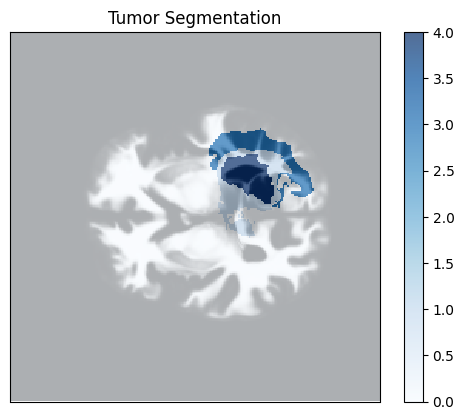

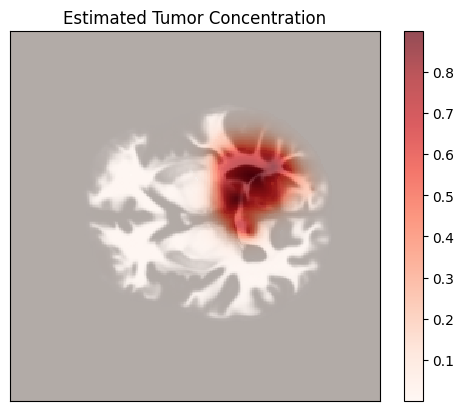

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

wm = nib.load(wmPath).get_fdata()
tumor = nib.load(tumorSegmentationPath).get_fdata()
predictedTumorConcentration = nib.load(savePath + "tumorImage.nii.gz").get_fdata()

plt.title("Tumor Segmentation")
zSlice = int(scipy.ndimage.center_of_mass(predictedTumorConcentration)[2])
toPlot = tumor[:,:,zSlice]
plt.imshow(wm[:,:,zSlice], cmap="gray", interpolation='none')
plt.imshow(toPlot, cmap="Blues",  alpha= 0.7 , interpolation='none')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

# Load the estimated tumor concentration
plt.title("Estimated Tumor Concentration")
zSlice = int(scipy.ndimage.center_of_mass(predictedTumorConcentration)[2])
toPlot = predictedTumorConcentration[:,:,zSlice]
plt.imshow(wm[:,:,zSlice], cmap="gray", interpolation='none')
plt.imshow(toPlot, cmap="Reds",  alpha= 0.7 , interpolation='none')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()
